# 003_ModelInterpretability
 Use Shap to understand feature importance

In [1]:
import pickle
import shap

from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# print the JS visualization code to the notebook
shap.initjs()

/Users/rory.hurley/Documents/GitHub/uscb_classifier/usbc_venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("../data/featurised/featurised_train.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [3]:
X

,age,class of worker,education,marital stat,major industry code,major occupation code,race,sex,capital gains,capital losses,dividends from stocks,citizenship,own business or self employed,weeks worked in year,wage per hour
0,73,3,2,3,14,6,4,0,0,0,0,1,0,0,0
1,58,6,3,0,4,8,4,1,0,0,0,1,0,52,0
2,18,3,5,1,14,6,1,0,0,0,0,0,0,0,0
3,9,3,5,1,14,6,4,0,0,0,0,1,0,0,0
4,10,3,5,1,14,6,4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152802,39,4,6,1,5,0,3,1,100,0,0,0,2,52,0
152803,87,3,5,4,14,6,4,1,0,0,0,1,0,0,0
152804,65,5,5,4,2,2,4,1,94,0,9,1,0,52,0
152805,47,3,3,4,14,6,4,1,0,0,155,0,0,52,0


In [4]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.27559
[100]	test-logloss:0.19035
[200]	test-logloss:0.16986
[300]	test-logloss:0.16157
[400]	test-logloss:0.15711
[500]	test-logloss:0.15439
[600]	test-logloss:0.15246
[700]	test-logloss:0.15108
[800]	test-logloss:0.15021
[900]	test-logloss:0.14955
[1000]	test-logloss:0.14912
[1100]	test-logloss:0.14870
[1200]	test-logloss:0.14842
[1300]	test-logloss:0.14819
[1400]	test-logloss:0.14800
[1500]	test-logloss:0.14777
[1600]	test-logloss:0.14761
[1700]	test-logloss:0.14749
[1800]	test-logloss:0.14738
[1900]	test-logloss:0.14733
[1978]	test-logloss:0.14730


In [5]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [8]:
shap.force_plot(explainer.expected_value, shap_values[0,:-1], X.iloc[0,:-1])

In [14]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:-1], X.iloc[:1000,:-1])

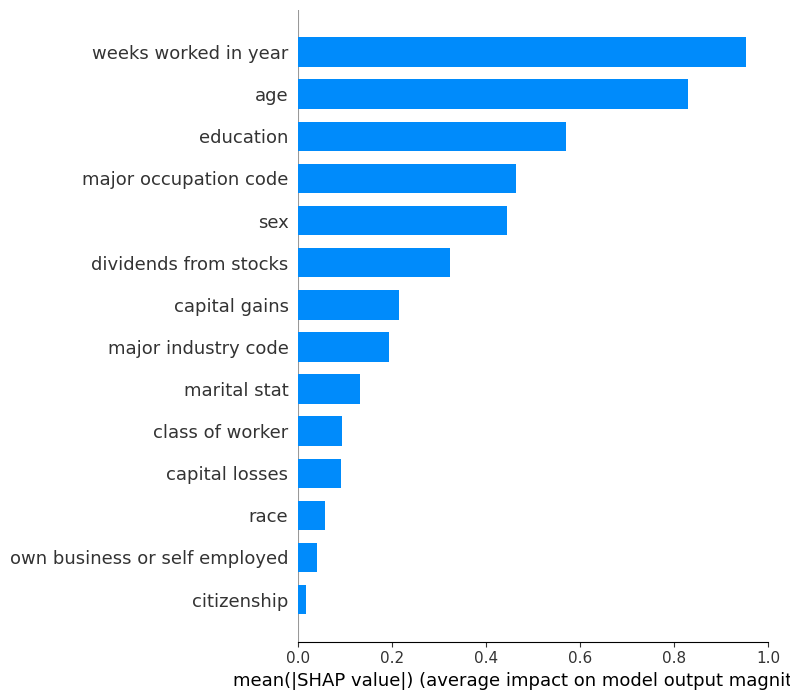

In [16]:
shap.summary_plot(shap_values[:,:-1], X.iloc[:, :-1], plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


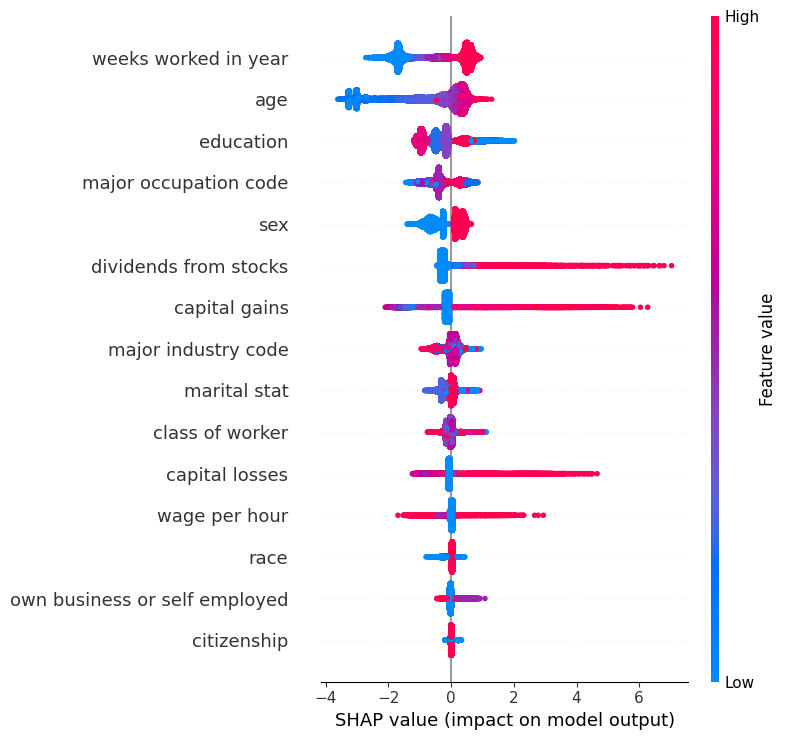

In [13]:
shap.summary_plot(shap_values, X)